In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the CSV file
file_path = os.path.join("..", "Final Data", "FINAL-THESIS-DATA.csv")
df = pd.read_csv(file_path)



<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    DATASET INFORMATION
</div>



In [21]:
# Display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Barangay_No   6336 non-null   int64  
 1   Barangay      6336 non-null   object 
 2   x             6336 non-null   float64
 3   y             6336 non-null   float64
 4   Year          6336 non-null   int64  
 5   Month         6336 non-null   int64  
 6   Dengue Cases  6336 non-null   int64  
 7   Temperature   6336 non-null   float64
 8   Humidity      6336 non-null   float64
 9   Rainfall      6336 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 495.1+ KB


In [22]:
# Count unique values
unique_counts = df.nunique()
print("Unique counts:\n", unique_counts)


Unique counts:
 Barangay_No     44
Barangay        44
x               42
y               42
Year            12
Month           12
Dengue Cases    52
Temperature     46
Humidity        75
Rainfall        93
dtype: int64


In [23]:
# Select unique barangays along with Brgy. No., x, and y
barangay_info = df.groupby(['Barangay_No', 'Barangay'], as_index=False)[['x', 'y']].first()

# Display the table
print(barangay_info)

    Barangay_No          Barangay       x         y
0             0             ABUNO  8.1846  124.2571
1             1             ACMAC  8.2740  124.2649
2             2     BAGONG SILANG  8.2418  124.2520
3             3          BONBONON  8.2667  124.2902
4             4           BUNAWAN  8.3023  124.3028
5             5           BURU-UN  8.1872  124.1688
6             6          DALIPUGA  8.3074  124.2550
7             7        DEL CARMEN  8.2322  124.2578
8             8         DIGKILAAN  8.2492  124.3178
9             9         DITUCALAN  8.1751  124.1927
10           10             DULAG  8.2040  124.3694
11           11        HINAPLANON  8.2467  124.2592
12           12           HINDANG  8.3177  124.3457
13           13        KABACSANAN  8.2815  124.3088
14           14        KALILANGAN  8.1747  124.3863
15           15           KIWALAN  8.2801  124.2668
16           16           LANIPAO  8.2266  124.3412
17           17            LUINAB  8.2472  124.2681
18          

In [24]:
# Get the first occurrence of each barangay
first_rows_per_barangay = df.groupby("Barangay", as_index=False).first()

# Display as a proper table
print(first_rows_per_barangay.to_string(index=False))

        Barangay  Barangay_No      x        y  Year  Month  Dengue Cases  Temperature  Humidity  Rainfall
           ABUNO            0 8.1846 124.2571  2011      1             0         23.8      88.1       7.0
           ACMAC            1 8.2740 124.2649  2011      1             0         23.8      88.1       7.0
   BAGONG SILANG            2 8.2418 124.2520  2011      1             0         23.8      88.1       7.0
        BONBONON            3 8.2667 124.2902  2011      1             0         23.8      88.1       7.0
         BUNAWAN            4 8.3023 124.3028  2011      1             0         23.8      88.1       7.0
         BURU-UN            5 8.1872 124.1688  2011      1             1         23.8      88.1       7.0
        DALIPUGA            6 8.3074 124.2550  2011      1             1         23.8      88.1       7.0
      DEL CARMEN            7 8.2322 124.2578  2011      1             1         23.8      88.1       7.0
       DIGKILAAN            8 8.2492 124.3178 


<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    TOTAL DENGUE CASES
</div>

In [25]:
# Total number of dengue cases for each year
total_cases_per_year = df.groupby("Year")["Dengue Cases"].sum().reset_index()

# Rename columns for clarity
total_cases_per_year.columns = ["Year", "Yearly Total Dengue Cases"]

# Display the result
print(total_cases_per_year)



    Year  Yearly Total Dengue Cases
0   2011                        150
1   2012                        334
2   2013                        312
3   2014                        641
4   2015                        876
5   2016                       1451
6   2017                        419
7   2018                       1360
8   2019                       4269
9   2020                        875
10  2021                        649
11  2022                        791



<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    Top 1 Barangay with the Highest Dengue Cases per Year
</div>


In [26]:
# Group by Year and Barangay, then sum the dengue cases
yearly_barangay_cases = df.groupby(["Year", "Barangay"])["Dengue Cases"].sum().reset_index()

# Find the barangay with the most dengue cases for each year
max_cases_per_year = yearly_barangay_cases.loc[
    yearly_barangay_cases.groupby("Year")["Dengue Cases"].idxmax()
]

# Rename columns for clarity
max_cases_per_year.columns = ["Year", "Barangay", "Total Dengue Cases for All Years"]

# Display the result
print(max_cases_per_year)


     Year   Barangay  Total Dengue Cases for All Years
24   2011  POBLACION                                19
84   2012      TUBOD                                49
128  2013      TUBOD                                43
172  2014      TUBOD                               103
216  2015      TUBOD                               103
260  2016      TUBOD                               171
304  2017      TUBOD                                33
348  2018      TUBOD                               175
392  2019      TUBOD                               351
420  2020  POBLACION                               100
480  2021      TUBOD                                59
524  2022      TUBOD                                93


<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    Plot of Total Dengue Cases Per Month Across All Years (2011-2022)
</div>

Total Dengue Cases Per Month (Across All Years):
    Month  Dengue Cases
0       1          1316
1       2           891
2       3           709
3       4           404
4       5           401
5       6           594
6       7          1550
7       8          1814
8       9          1142
9      10          1038
10     11          1179
11     12          1089


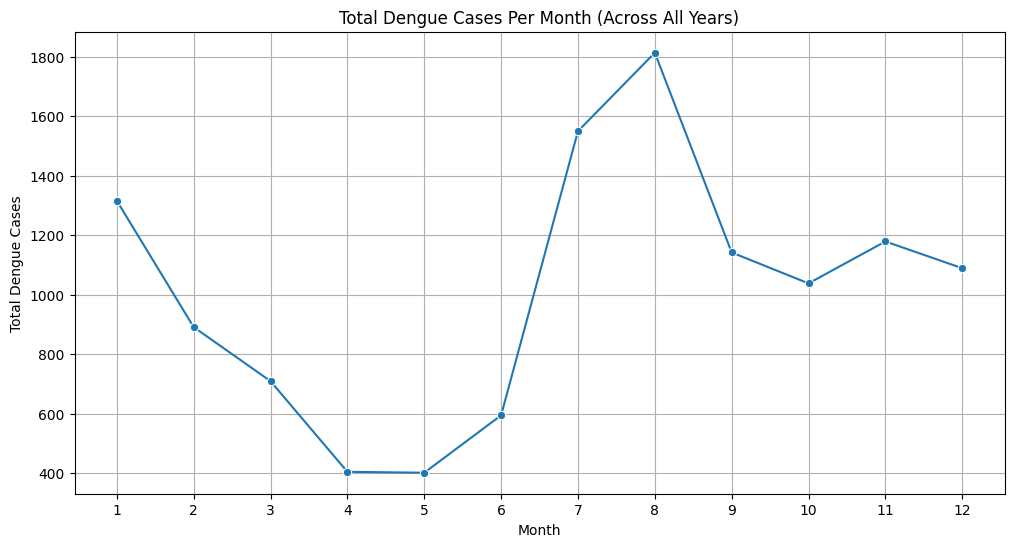

In [29]:
# Ensure 'Dengue Cases' is numeric
df['Dengue Cases'] = pd.to_numeric(df['Dengue Cases'], errors='coerce')

# Group by Year and Month, then sum the Dengue Cases
monthly_dengue_cases = df.groupby(['Year', 'Month'])['Dengue Cases'].sum().reset_index()

# Aggregate the total dengue cases per month across all years
monthly_dengue_cases_sum = monthly_dengue_cases.groupby('Month')['Dengue Cases'].sum().reset_index()

# Display the results
print("Total Dengue Cases Per Month (Across All Years):")
print(monthly_dengue_cases_sum)

# Plot the total dengue cases per month across all years
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_dengue_cases_sum['Month'], y=monthly_dengue_cases_sum['Dengue Cases'], marker='o')

plt.xticks(range(1, 13))  # Ensure month labels are 1-12
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.title("Total Dengue Cases Per Month (Across All Years)")
plt.grid()
plt.show()


<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    Plot of Monthly Dengue Cases by Year (2011–2022)
</div>

Total Dengue Cases Per Month for Each Year:
     Year  Month  Dengue Cases
0    2011      1            24
1    2011      2            27
2    2011      3            19
3    2011      4             7
4    2011      5             9
..    ...    ...           ...
139  2022      8            77
140  2022      9            78
141  2022     10            57
142  2022     11            60
143  2022     12            41

[144 rows x 3 columns]


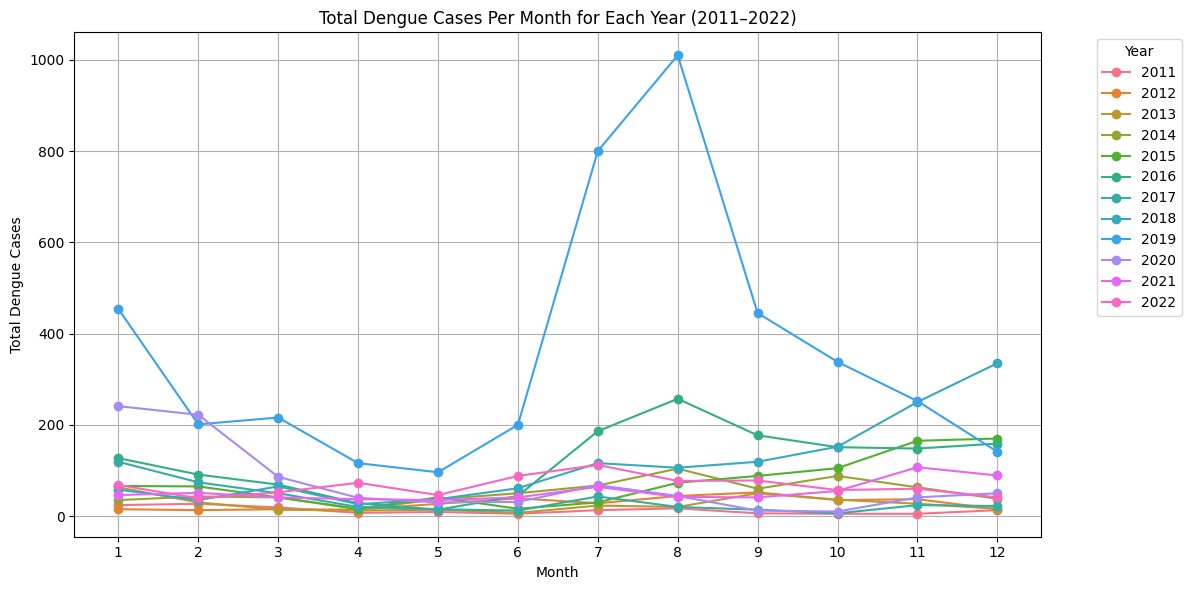

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Year and Month, then sum the Dengue Cases
monthly_dengue_cases = df.groupby(['Year', 'Month'])['Dengue Cases'].sum().reset_index()

# Display the results
print("Total Dengue Cases Per Month for Each Year:")
print(monthly_dengue_cases)

# Generate a unique color for each year using a larger color palette
years = sorted(monthly_dengue_cases['Year'].unique())
num_years = len(years)
palette = sns.color_palette("husl", num_years)  # HUSL gives evenly spaced, visually distinct colors

# Create a mapping from year to color
year_color_map = dict(zip(years, palette))

# Plot
plt.figure(figsize=(12, 6))
for year in years:
    data = monthly_dengue_cases[monthly_dengue_cases['Year'] == year]
    plt.plot(data['Month'], data['Dengue Cases'], label=year, marker='o', color=year_color_map[year])

plt.xticks(range(1, 13))  # Ensure month labels are 1–12
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.title("Total Dengue Cases Per Month for Each Year (2011–2022)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.grid()
plt.tight_layout()
plt.show()
